In [134]:
import re
import numpy as np
from scipy.spatial import distance
import scipy.linalg

import matplotlib.pyplot as plt

# Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

In [85]:
with open("sentences.txt", 'r', encoding = "utf-8") as fin:
    N = 0
    file = set()
    for now in fin:
        N += 1
        now = re.split('[^a-z]',now.lower())
        file |= set(now) - set([''])
    words = dict()
    index = 0
    for word in file:
        words[word] = index
        index += 1
    d = index

In [86]:
TxtMtrx = np.zeros((N,d))
with open("sentences.txt", 'r', encoding = "utf-8") as fin:
    i = 0
    for line in fin:
        line = set(re.split('[^a-z]',line.lower())) - set([''])
        for word in line:
            TxtMtrx[i][words[word]] += 1
        i += 1   

In [88]:
min1 = distance.cosine(TxtMtrx[0],TxtMtrx[1])
min2 = distance.cosine(TxtMtrx[0],TxtMtrx[2])
index1, index2 = 1, 2
if min1 > min2:
    min1, min2 = min2, min1
    index1, index2 = 2, 1
for i in range(3,N):
    dist = distance.cosine(TxtMtrx[0],TxtMtrx[i])
    if dist < min1:
        index1, index2 = i, index1
        min1, min2 = dist, min1
    elif dist < min2:
            index2 = i
            min2 = dist
with open("submission-1.text",'w',encoding='utf-8') as fout:
    print(*sorted([index1, index2]),end='',file=fout)

# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [162]:
xx = np.array([1,4,10,15])
fn = np.sin(xx/5) * np.exp(xx/10) + 5*np.exp(-xx/2)
A = [[1,1,1,1],
     [1,4,16,64],
     [1,10,100,1000],
     [1,15,225,3375]]
w = scipy.linalg.solve(A,fn)
#w = list(map(lambda x: round(x,2),w))
with open("submission-2.text",'w',encoding='utf-8') as fout:
    print(*w, end='',file=fout)

In [163]:
#150 linearly spaced numbers
x = np.linspace(0,16,200)

# The function to draw
f = np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)
y = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

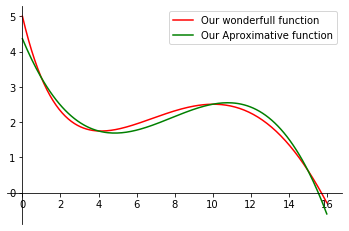

In [165]:
#Setting the axe at the center
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.plot(x,f,'r-',label='Our wonderfull function')
plt.plot(x,y,'g-',label='Our Aproximative function')
plt.legend(loc = 'upper right')
#plt.ylabel("Numbers")
plt.show()

## Прочие задания

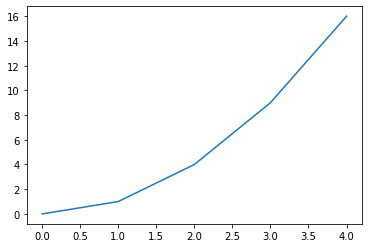

In [84]:
plt.plot([0,1,2,3,4],[0,1,4,9,16])
plt.show()

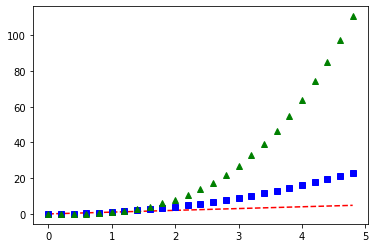

In [101]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()
